# Importar librerías necesarias

In [1]:
import pandas as pd
import time
import numpy as np
import string
import re

In [ ]:
#df_train = pd.read_csv('https://raw.githubusercontent.com/david-T-M/Data/main/train.csv')

In [3]:
#df_train = pd.read_csv('/content/brown.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/labsemco/EVIA-UAEM/main/Modelos%20Vectoriales/zoe.csv',encoding='latin-1')

In [4]:
df_train

,doc_id,label,Texto
0,1,Labios Rotos,Regalame tu corazón y dejame entrar a ese luga...
1,2,Te Soñe,"Ruego el tiempo, aquel momento en que mi mundo..."
2,3,Luna,"Entiendo que no puedo suplicarle una vez mas, ..."
3,4,Vinyl,"Hoy desperté deslizandome en un rayo de luna, ..."
4,5,S.O.S.,"S.O.S. en el radar, suena fuerte la señal, cam..."
...,...,...,...
59,60,Un sábado más,ESTA NOCHE HE CRUZADO EL PUENTE MI RELOJ SE HA...
60,61,Popular,"Y cuando sientas que no puedes más, Que no enc..."
61,62,SKR,"CON TUS SONRISAS DE COLOR, PINTABA MELODÍAS EN..."
62,63,Azul,"Tú, qué manera de aferrarte, tú Tú, que me orb..."


# **Modelación de documentos de entrenamiento**


## 1.- Creacion de matriz para SVD :
Corpus de tamaño **N**, y vocabulario **v**

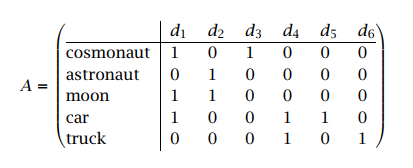

In [5]:
# with 40 texts = 40 articulos
nd=1256
train = df_train.iloc[0:nd]
list_tokens = [] # lista de palabras totales
big_string = ''
for index,string in train.iterrows():
    big_string += re.sub(r'[.,"\'-?:!;]', '', string['Texto'])+ ' '
    string1 = re.sub(r'[.,"\'-?:!;]', '',string['Texto']).split(' ')
    list_tokens.append(string1)

In [6]:
train

,doc_id,label,Texto
0,1,Labios Rotos,Regalame tu corazón y dejame entrar a ese luga...
1,2,Te Soñe,"Ruego el tiempo, aquel momento en que mi mundo..."
2,3,Luna,"Entiendo que no puedo suplicarle una vez mas, ..."
3,4,Vinyl,"Hoy desperté deslizandome en un rayo de luna, ..."
4,5,S.O.S.,"S.O.S. en el radar, suena fuerte la señal, cam..."
...,...,...,...
59,60,Un sábado más,ESTA NOCHE HE CRUZADO EL PUENTE MI RELOJ SE HA...
60,61,Popular,"Y cuando sientas que no puedes más, Que no enc..."
61,62,SKR,"CON TUS SONRISAS DE COLOR, PINTABA MELODÍAS EN..."
62,63,Azul,"Tú, qué manera de aferrarte, tú Tú, que me orb..."


In [7]:
#### to evaluate the size of the sample (N tokens, vocabulary v)
string_list = big_string.split(' ')
N = len(string_list) #número de tokens

# Set is used to avoid repetition
set1 = set()
for word in string_list:
    if(word!=''):
      set1.add((word,string_list.count(word)))

ranking_words = pd.DataFrame(set1)
ranking_words.columns = ['word', 'count']
ranking_words = ranking_words.sort_values(['count'], ascending = False)
v = len(ranking_words)
print('Cuantas palabras ?' , N, '\nTamaño del vocabulario ?', v)
ranking_words.tail()

Cuantas palabras ? 8510 
Tamaño del vocabulario ? 2178


,word,count
1341,exhala,1
574,AGOTADO,1
1338,visibles,1
575,FLOTAR,1
1089,devoción,1


In [8]:
ranking_words = ranking_words.assign(f_documentos=0)

In [9]:
M = pd.DataFrame(0.0, index=ranking_words['word'], columns=train['doc_id'])

In [10]:
columnas=M.columns

In [11]:
temp=M.copy()
temp1=M.copy()
for i in range((temp.shape[1])):
  texto=train.loc[i,'Texto'].split(' ')
  #print(texto)
#  print(texto,i)
  for index, documento in temp1.iterrows():
    #print(index,documento[i],texto.count(index))
    #print(i,index)
    M.at[index,columnas[i]]=texto.count(index)
M

doc_id,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
word,,,,,,,,,,,,,,,,,,,,,
de,1.0,4.0,4.0,13.0,7.0,8.0,8.0,6.0,0.0,1.0,...,3.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,4.0,0.0
que,2.0,5.0,7.0,7.0,0.0,7.0,4.0,0.0,0.0,6.0,...,2.0,4.0,0.0,0.0,3.0,0.0,6.0,0.0,5.0,5.0
en,1.0,13.0,0.0,4.0,2.0,0.0,8.0,2.0,0.0,0.0,...,0.0,2.0,0.0,0.0,6.0,0.0,8.0,0.0,7.0,0.0
no,1.0,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,...,0.0,4.0,0.0,0.0,10.0,0.0,6.0,0.0,3.0,0.0
el,9.0,9.0,0.0,0.0,1.0,5.0,11.0,0.0,0.0,4.0,...,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exhala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGOTADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
visibles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
M.to_pickle("M.pickle")

Calcular el TF-IDF de la matriz Z

In [13]:
ranking_words.set_index('word',inplace = True)

In [14]:
M

doc_id,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
word,,,,,,,,,,,,,,,,,,,,,
de,1.0,4.0,4.0,13.0,7.0,8.0,8.0,6.0,0.0,1.0,...,3.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,4.0,0.0
que,2.0,5.0,7.0,7.0,0.0,7.0,4.0,0.0,0.0,6.0,...,2.0,4.0,0.0,0.0,3.0,0.0,6.0,0.0,5.0,5.0
en,1.0,13.0,0.0,4.0,2.0,0.0,8.0,2.0,0.0,0.0,...,0.0,2.0,0.0,0.0,6.0,0.0,8.0,0.0,7.0,0.0
no,1.0,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,...,0.0,4.0,0.0,0.0,10.0,0.0,6.0,0.0,3.0,0.0
el,9.0,9.0,0.0,0.0,1.0,5.0,11.0,0.0,0.0,4.0,...,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exhala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGOTADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
visibles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
temp=M.copy()
for index,articulo in temp.iterrows():
  #print(len(articulo))
  conteo=0.0
  for i in range(1,len(articulo)):
    if(float(articulo[i])>0.0):
      conteo+=1
  ranking_words.at[index,'f_documentos']=conteo
ranking_words

,count,f_documentos
word,,
de,272,47
que,203,40
en,174,38
no,166,35
el,162,36
...,...,...
exhala,1,1
AGOTADO,1,1
visibles,1,1


In [16]:
Mzero=M
Mzero

doc_id,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
word,,,,,,,,,,,,,,,,,,,,,
de,1.0,4.0,4.0,13.0,7.0,8.0,8.0,6.0,0.0,1.0,...,3.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,4.0,0.0
que,2.0,5.0,7.0,7.0,0.0,7.0,4.0,0.0,0.0,6.0,...,2.0,4.0,0.0,0.0,3.0,0.0,6.0,0.0,5.0,5.0
en,1.0,13.0,0.0,4.0,2.0,0.0,8.0,2.0,0.0,0.0,...,0.0,2.0,0.0,0.0,6.0,0.0,8.0,0.0,7.0,0.0
no,1.0,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,...,0.0,4.0,0.0,0.0,10.0,0.0,6.0,0.0,3.0,0.0
el,9.0,9.0,0.0,0.0,1.0,5.0,11.0,0.0,0.0,4.0,...,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exhala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGOTADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
visibles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


calculate TF_IDF

In [17]:
temp=Mzero.copy()

In [18]:
temp1=Mzero.copy()

In [19]:
for index,articulo in temp.iterrows():
  for i in range(len(articulo)):
    Mzero.at[index,columnas[i]]=temp1.at[index,columnas[i]]*np.log10((1+nd)/(1+ranking_words.loc[index,'f_documentos']))

In [20]:
Mzero.to_pickle("MZero.pickle")

In [21]:
Mzero

doc_id,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
word,,,,,,,,,,,,,,,,,,,,,
de,1.418094,5.672376,5.672376,18.435223,9.926658,11.344752,11.344752,8.508564,0.000000,1.418094,...,4.254282,7.090470,0.0,0.0,7.090470,0.000000,7.090470,0.0,5.672376,0.000000
que,2.973103,7.432757,10.405860,10.405860,0.000000,10.405860,5.946206,0.000000,0.000000,8.919309,...,2.973103,5.946206,0.0,0.0,4.459654,0.000000,8.919309,0.0,7.432757,7.432757
en,1.508271,19.607519,0.000000,6.033083,3.016541,0.000000,12.066165,3.016541,0.000000,0.000000,...,0.000000,3.016541,0.0,0.0,9.049624,0.000000,12.066165,0.0,10.557895,0.000000
no,1.543033,3.086066,4.629098,4.629098,1.543033,1.543033,0.000000,0.000000,0.000000,4.629098,...,0.000000,6.172131,0.0,0.0,15.430328,0.000000,9.258197,0.0,4.629098,0.000000
el,13.780202,13.780202,0.000000,0.000000,1.531134,7.655668,16.842469,0.000000,0.000000,6.124534,...,4.593401,6.124534,0.0,0.0,1.531134,0.000000,9.186801,0.0,10.717935,1.531134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exhala,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
AGOTADO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,2.798305,0.000000,0.0,0.000000,0.000000
visibles,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


## Descomposición de valores singulares

## Primer paso : Aproximación de mínimos cuadrados

La proyección SVD es calculada por descomposición, la matriz de representaciones de documentos. (40 documents, vocabulary of N terms)
$M_{N×40}$ en el producto de tres matrices, $ U_{N×d}, Sigma_{d×d}$, y $(V_{40×d})^{T}$ ,con $d = min(N,40) = 40 $ :  $$M_{N×40} = U_{N×40}.Sigma_{40×40}.(V_{40×N})^{T}$$

- Las matrices U y V representan términos y documentos en este nuevo espacio. Por ejemplo, la primera columna de U corresponde a la primera fila de M, y la primera columna de V corresponde a la primera columna de M.
- La matriz diagonal Sigma contiene los valores singulares de M en orden descendente

In [22]:
from numpy import array
from scipy.linalg import svd

In [23]:
? svd # doc of svd()

Object ` svd # doc of svd()` not found.


In [24]:
U, s, VT = svd(Mzero)
d = min(Mzero.shape[0], Mzero.shape[1])
Sigma = np.zeros((d,d))
Sigma[:Mzero.shape[0], :Mzero.shape[0]] = np.diag(s)

In [25]:
print('\nU :\n', U.round(2))
print('\nSigma :\n',Sigma.round(2))
print('\nVT :\n',VT.round(2))


U :
 [[-0.36 -0.02  0.37 ...  0.   -0.    0.  ]
 [-0.33 -0.01 -0.22 ... -0.02  0.    0.  ]
 [-0.29 -0.01  0.13 ...  0.   -0.    0.  ]
 ...
 [-0.   -0.   -0.   ...  0.99  0.    0.  ]
 [-0.    0.    0.   ...  0.    0.99  0.  ]
 [ 0.    0.    0.   ...  0.    0.    1.  ]]

Sigma :
 [[147.67   0.     0.   ...   0.     0.     0.  ]
 [  0.   103.46   0.   ...   0.     0.     0.  ]
 [  0.     0.    79.14 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ...  16.1    0.     0.  ]
 [  0.     0.     0.   ...   0.    15.69   0.  ]
 [  0.     0.     0.   ...   0.     0.    15.56]]

VT :
 [[-0.11 -0.16 -0.14 ... -0.01 -0.17 -0.11]
 [-0.   -0.01 -0.01 ...  0.37  0.01  0.02]
 [ 0.09  0.07 -0.07 ...  0.01 -0.03 -0.11]
 ...
 [ 0.01  0.03  0.04 ... -0.    0.03  0.  ]
 [-0.01  0.03  0.01 ... -0.   -0.01 -0.01]
 [-0.   -0.   -0.   ... -0.03 -0.   -0.  ]]


## Segundo paso : restringir el número de dimensiones

Restringiendo las matrices U, Sigma y VT a sus primeras k < n filas se obtienen las matrices $ U_{N×k}, Sigma_{k×k}$, y $VT_{k×40}$

#SVD usado para reducir dimensionalidad

**FIGURE 2** : La matriz de documentos despues de rescalar y reducir a dos dimensiones.

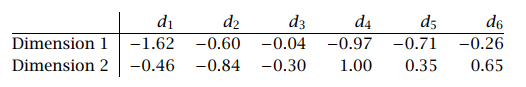

In [26]:
# seleccionar el número de documentos
n_elements = 2
Sigma = Sigma[:n_elements, :n_elements]
VT = VT[:n_elements, :]
U = U[:, :n_elements]
# by the way, we can also reconstruct A
Mreconstructed = U.dot(Sigma.dot(VT))
print('M :\n', Mreconstructed.round(3))

M :
 [[ 5.994e+00  8.694e+00  7.714e+00 ... -5.010e-01  8.987e+00  5.987e+00]
 [ 5.367e+00  7.781e+00  6.906e+00 ... -1.170e-01  8.063e+00  5.383e+00]
 [ 4.748e+00  6.884e+00  6.110e+00 ... -1.550e-01  7.131e+00  4.758e+00]
 ...
 [ 5.300e-02  7.700e-02  6.800e-02 ... -9.000e-03  7.900e-02  5.300e-02]
 [-0.000e+00 -2.000e-03 -1.000e-03 ...  1.530e-01  7.000e-03  1.000e-02]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]]


## Tercer paso : reescalando con valores singulares
EL objetivo es obtener la matriz con dimensión redicida $ B = Sigmak_{k×k}.VT_{k×40} $ de documentos, con valores singulares y reducción a dos dimensiones.

In [27]:
# transform
B = Sigma.dot(VT)[:n_elements,:]
print('\nB = \n', B.round(2))


B = 
 [[-1.646e+01 -2.385e+01 -2.118e+01 -2.632e+01 -9.480e+00 -1.364e+01
  -2.009e+01 -1.091e+01 -8.200e-01 -1.047e+01 -1.001e+01 -3.195e+01
  -2.527e+01 -5.700e-01 -2.273e+01 -3.054e+01 -2.300e+01 -2.051e+01
  -2.179e+01 -1.213e+01 -1.000e+01 -2.392e+01 -1.665e+01 -7.280e+00
  -1.292e+01 -2.720e+01 -1.571e+01 -2.795e+01 -2.713e+01 -6.104e+01
  -2.503e+01 -2.613e+01 -1.954e+01 -1.690e+01 -9.990e+00 -1.520e+00
  -1.192e+01 -8.900e-01 -1.125e+01 -7.500e-01 -7.800e-01 -1.460e+01
  -6.830e+00 -1.711e+01 -6.800e-01 -1.080e+00 -1.067e+01 -2.103e+01
  -4.000e+00 -2.360e+01 -3.600e-01 -1.713e+01 -1.190e+00 -3.210e+00
  -6.560e+00 -1.910e+01 -1.690e+00 -1.900e-01 -2.237e+01 -8.900e-01
  -2.436e+01 -1.120e+00 -2.481e+01 -1.661e+01]
 [-4.600e-01 -1.140e+00 -7.100e-01 -1.140e+00 -5.500e-01  7.500e-01
  -3.300e-01 -6.400e-01  1.527e+01 -4.900e-01 -1.100e-01 -9.800e-01
  -1.380e+00  2.529e+01 -1.220e+00 -1.670e+00 -1.230e+00 -1.140e+00
  -1.300e-01 -3.000e-01 -5.600e-01 -1.380e+00  9.300e-01 -3.20

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

%matplotlib inline

for k in range(len(B[0])):
  x=B[0][k]
  y=B[1][k]
  B[0][k]= x/np.sqrt((x**2+y**2))
  B[1][k]= y/np.sqrt((x**2+y**2))

x = B[0]
y = B[1]
labels = np.arange(0,len(x))

fig = px.scatter(x=x, y=y, text=labels)
fig.update_traces(textposition='top center')
fig.show()


In [29]:
train.at[7,'Texto']

'En tu planeta me quede, fue por un tiempo y nunca fue mi plan. Pero mi nave se averio y ahora estoy perdido aqui, en mañanas con tres soles y multiples visiones, montañas transparentes, anemonas de luz, particulas de amor y recuerdos de tiiiiiiiiii. Love, love, love. Love, love, love. En tu planeta me quede, fue por un tiempo y nunca fue mi plan. Pero mi nave se averio y ahora estoy perdido aqui, en mañanas con tres soles y multiples visiones, montañas transparentes, anemonas de luz, particulas de amor y recuerdos de tiiiiiiiiiiiii. Love, love, love. Love, love, love. Love, love, love, love, love...'

In [30]:
train.at[17,'Texto']

"Recuerdo a Poli era mi chica ideal una dulce perla blanca mexicana la cual yo amaba pero nunca pude tener ni mostrarle todo lo que le escribi en el fondo del mar satelites flotando por el universo en busca de señal señales de vida en su constelacion electroradiograma de amor destellos de mil años luz esta es la historia de una vieja cancion la de la primera vez Recuerdo a Poli era mi chica ideal una dulce perla blanca mexicana la cual yo amaba pero nunca pude tener ni mostrarle todo lo que le escribi en la espalda del sol satelites flotando por el universo en busca de señal señales de vida en su constelacion mensajes o evidencia de amor destellos de mil años luz esta es la historia de una vieja cancion la de la primera vez she's all i wanted she's all i needed the dream the dream of all the men in Mexico"

#PCA (Principal Component Analysis)

In [31]:
from sklearn import decomposition

In [32]:
pca=decomposition.PCA(n_components=40)
pc=pca.fit_transform(Mzero)

In [33]:
df=pd.DataFrame({'var':pca.explained_variance_ratio_})

<Axes: ylabel='var'>

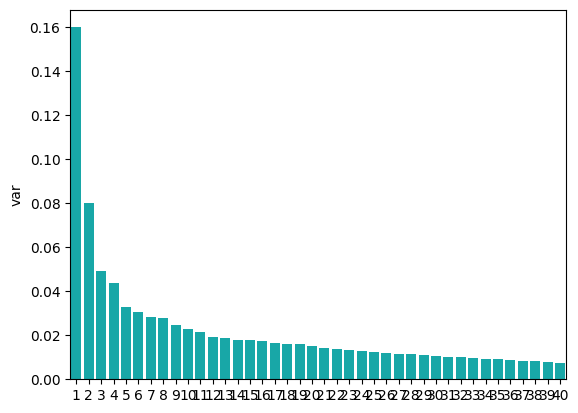

In [34]:
import seaborn as sns
sns.barplot(x=list(range(1,40+1)),y='var',data=df,color='c')

In [35]:
pc

array([[ 5.24663305e+01,  6.60573582e-01,  3.01293747e+01, ...,
         1.39020813e+00,  4.50382911e-01,  5.11330736e-01],
       [ 4.74206858e+01,  2.85663859e+00, -1.67726668e+01, ...,
         4.39957933e-01, -1.45035206e+00,  2.07386452e+00],
       [ 4.16089717e+01,  1.65045251e+00,  1.11944801e+01, ...,
         7.11522938e-01, -2.59074773e+00,  2.00131208e-02],
       ...,
       [-3.32958740e-01, -5.07105591e-01, -4.61752777e-01, ...,
        -4.61608127e-01, -2.52059454e-01,  8.33361770e-01],
       [-8.40077724e-01, -1.23451712e-01, -1.44764640e-01, ...,
         1.08257348e-01,  1.45300086e-01,  5.35954302e-02],
       [-8.14417106e-01, -5.26915713e-01, -1.59448148e-01, ...,
         1.45969416e-02, -1.60416929e-02,  4.79427903e-02]])

In [36]:
%matplotlib inline

for k in range(len(pc[0])):
  x=pc[0][k]
  y=pc[1][k]
  pc[0][k]= x/np.sqrt((x**2+y**2))
  pc[1][k]= y/np.sqrt((x**2+y**2))

x = pc[0]
y = pc[1]
labels = np.arange(0,len(x))

fig = px.scatter(x=x, y=y, text=labels)
fig.update_traces(textposition='top center')
fig.show()

In [37]:
train.at[26,'Texto']

'Dime si me estoy volviendo loko dime por favor si a ti te pasa igual... mi corazón atómico en cuenta regresiva esta parece que perdi el control a mi ya no,ya no me importa nada... Acaricia mi alma suavisa mi ser sintetiza mi sangre y purifica mi amor... Parece que perdi el control pero ya no,ya no me importa nada dime si me estoy volviendo loko dime por favor si ati te pasa iwal... I just don´t know where im going but i know where ill stay i just don´t know wheere to find her but i know where ill stay i just know where to find her but know she can´t hide... Acaricia mi alma suavisa mi ser sintetiza mi sangre y purifica mi amor Acaricia mi alma suavisa mi ser sintetiza mi sangre y purifica mi amor... Acaricia mi alma suavisa mi ser esteriliza mi sangre y purifica mi amor... y purifica mi amor... y purifica mi amor...'

In [38]:
train.at[26,'label']

'Corazón atomico'

In [39]:
t1=set(train.at[26,'Texto'].split())

In [40]:
train.at[16,'Texto']

'Reptilectric tus alas electricas, son de verde cristal, de vapor iluminador, Reptilectric, ya no creo en ningun dios, creo en el mar sideral, y en el templo bajo mi piel. Reptilectric, no me arrepiento de nada, quiero libertad en un mundo material, sentir el amor sin volverme a enamorar, y olvidarme de todo lo que hace sufrir, Reptilectric, no me arrepiento de nada. Reptilectric, profeta galactico, mensajero de luz aqui estamos esperandote, Reptilectric, no me arrepiento de nada, Reptilectric, bienvenido a la tierra. Quiero libertad en un mundo material, sentir el amor sin volverme a enamorar, y olvidarme de todo lo que hace sufrir, Reptilectric, bienvenido a la tierra. Una mañana en el horizonte, bajando por el triangulo del sol, del sol. Quiero libertad en un mundo material, sentire el amor sin volverlo a encarcelar, y soltarme de todo lo que hace sufrir, Reptilectric, bienvenido a la tierra.'

In [41]:
train.at[16,'label']

'Reptilectric'

In [42]:
t2=set(train.at[16,'Texto'].split())

In [43]:
t1.intersection(t2)

{'a', 'amor', 'el', 'en', 'me', 'mi', 'no', 'por', 'que', 'y', 'ya'}

In [45]:
Mzero

doc_id,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
word,,,,,,,,,,,,,,,,,,,,,
de,1.418094,5.672376,5.672376,18.435223,9.926658,11.344752,11.344752,8.508564,0.000000,1.418094,...,4.254282,7.090470,0.0,0.0,7.090470,0.000000,7.090470,0.0,5.672376,0.000000
que,2.973103,7.432757,10.405860,10.405860,0.000000,10.405860,5.946206,0.000000,0.000000,8.919309,...,2.973103,5.946206,0.0,0.0,4.459654,0.000000,8.919309,0.0,7.432757,7.432757
en,1.508271,19.607519,0.000000,6.033083,3.016541,0.000000,12.066165,3.016541,0.000000,0.000000,...,0.000000,3.016541,0.0,0.0,9.049624,0.000000,12.066165,0.0,10.557895,0.000000
no,1.543033,3.086066,4.629098,4.629098,1.543033,1.543033,0.000000,0.000000,0.000000,4.629098,...,0.000000,6.172131,0.0,0.0,15.430328,0.000000,9.258197,0.0,4.629098,0.000000
el,13.780202,13.780202,0.000000,0.000000,1.531134,7.655668,16.842469,0.000000,0.000000,6.124534,...,4.593401,6.124534,0.0,0.0,1.531134,0.000000,9.186801,0.0,10.717935,1.531134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exhala,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
AGOTADO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,2.798305,0.000000,0.0,0.000000,0.000000
visibles,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


Creación de dataframe con distancias

In [143]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
def dist_euclidiana(a,b):
  dist = np.linalg.norm(a-b)
  return dist
def similitud_coseno(c,d):
  result = dot(c, d)/(norm(c)*norm(d))
  return result
def max_min_eucli(df_t,id):
  l=df_t.iloc[id-1].to_list()
  print(l.index(min(l)),"distancia eucl",min(l))
def max_min_coseno(df_t,id):
  l=df_t.iloc[id-1].to_list()
  print(l.index(max(l)),"distancia coseno",max(l))

In [125]:
ind=Mzero.columns
distancias_euclideanas_docs = pd.DataFrame(index=ind,columns=ind)
distancias_cosenos_docs = pd.DataFrame(index=ind,columns=ind)

In [126]:
for i in range(1,len(ind)+1):
  a=Mzero[i].to_list()
  for j in range(1,len(ind)+1):
    b=Mzero[j].to_list()
    if i==j:
      distancias_cosenos_docs.at[i,j]=0
      distancias_euclideanas_docs.at[i,j]=100000
    else:
      distancias_cosenos_docs.at[i,j]=similitud_coseno(np.array(a),np.array(b))
      distancias_euclideanas_docs.at[i,j]=dist_euclidiana(np.array(a),np.array(b))

In [127]:
distancias_cosenos_docs

doc_id,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
doc_id,,,,,,,,,,,,,,,,,,,,,
1,0,0.156512,0.193345,0.102108,0.105207,0.115668,0.194772,0.16671,0.004949,0.149075,...,0.125683,0.12151,0.00659,0.0,0.125877,0.002313,0.177761,0.00179,0.18736,0.096599
2,0.156512,0,0.214464,0.171653,0.232178,0.188283,0.301615,0.209725,0.0,0.213028,...,0.127392,0.213592,0.0,0.0,0.302767,0.0,0.350528,0.0,0.211938,0.098505
3,0.193345,0.214464,0,0.308529,0.256883,0.162216,0.130742,0.198137,0.006071,0.225393,...,0.138735,0.309971,0.008085,0.0,0.230448,0.002837,0.347845,0.002195,0.239134,0.200735
4,0.102108,0.171653,0.308529,0,0.283335,0.190012,0.214816,0.192148,0.004173,0.208667,...,0.122392,0.209732,0.005558,0.0,0.190175,0.00195,0.304629,0.001509,0.204818,0.132408
5,0.105207,0.232178,0.256883,0.283335,0,0.175725,0.250766,0.323761,0.0,0.14358,...,0.166932,0.218379,0.0,0.0,0.257997,0.0,0.273917,0.0,0.109282,0.061199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.002313,0.0,0.002837,0.00195,0.0,0.011329,0.004598,0.0,0.351507,0.0,...,0.004735,0.022137,0.321269,0.273065,0.0,0,0.002807,0.526092,0.012215,0.014774
61,0.177761,0.350528,0.347845,0.304629,0.273917,0.233022,0.309269,0.177325,0.006007,0.300294,...,0.200185,0.32587,0.007999,0.0,0.311314,0.002807,0,0.002172,0.308801,0.207902
62,0.00179,0.0,0.002195,0.001509,0.0,0.008766,0.003558,0.0,0.369009,0.0,...,0.003664,0.017129,0.370945,0.333894,0.0,0.526092,0.002172,0,0.009452,0.011432


In [128]:
distancias_euclideanas_docs

doc_id,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
doc_id,,,,,,,,,,,,,,,,,,,,,
1,100000,60.022675,52.935241,67.036584,48.249589,55.400559,58.007922,50.696999,55.368415,49.022497,...,48.138197,58.794061,65.657614,49.373825,59.457112,64.098034,53.647535,74.004423,62.232542,64.27221
2,60.022675,100000,53.176313,65.154784,46.7507,54.059802,54.778196,50.488894,56.544294,48.521067,...,49.233409,56.471202,66.759297,50.547845,53.882113,65.079888,48.690535,74.856453,62.019099,65.015847
3,52.935241,53.176313,100000,55.329037,37.794202,48.127034,55.105667,43.451929,48.670546,40.298194,...,40.570878,47.378401,60.117243,41.724516,50.870284,58.409919,42.652525,69.136208,56.038645,55.937363
4,67.036584,65.154784,55.329037,100000,52.173757,59.502618,62.909537,56.923211,62.52083,54.886014,...,55.866207,61.647268,71.792166,57.279729,63.05245,70.368677,55.619185,79.497468,66.739679,68.550543
5,48.249589,46.7507,37.794202,52.173757,100000,39.514997,45.464106,31.49374,38.19844,31.255876,...,28.155863,43.718088,52.140842,28.582307,43.982762,49.972547,37.766558,62.171956,53.800628,53.096533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,64.098034,65.079888,58.409919,70.368677,49.972547,58.205718,64.220293,54.834273,45.148903,52.175129,...,50.271445,61.743747,54.065406,43.971045,63.312573,100000,58.662464,51.719456,68.295556,66.846055
61,53.647535,48.690535,42.652525,55.619185,37.766558,46.294245,49.465762,44.286781,48.97334,38.756812,...,39.628415,47.034631,60.362646,42.077325,48.372972,58.662464,100000,69.349703,53.75201,55.890479
62,74.004423,74.856453,69.136208,79.497468,62.171956,68.963775,74.110342,66.142983,55.205654,63.955772,...,62.412458,71.974905,60.095637,55.041137,73.325157,51.719456,69.349703,100000,77.668396,76.396936


In [148]:
max_min_eucli(distancias_euclideanas_docs,1)
max_min_coseno(distancias_cosenos_docs,1)

48 distancia eucl 47.6216911016369
15 distancia coseno 0.3136795777883421
